# ELG7186 - fall 2022 - Assignment 1
## Due: <strong>Wednesday Oct. 12<sup>th</sup> 2022 -- 11:59pm</strong>

The purpose of this assignment is to gain some experience working with the tools you will use throughout the course. You will learn:
- The basics of data loading and preparation
- Classification using the k-NN algorithm
- Classification using a Support Vector Machine (SVM)
- Calculation of metrics to assess the performance of your model

### Submission Details
Submit your Jupyter notebook .ipynb file using Brightspace. Do not include any other files or images as they will not be reviewed.
<p>
<strong>Make certain that you run all the cells in the notebook you will submit</strong> or you will loose marks.
</p>
<ul>
<li>You can submit multiple times, but only the most recent submission will be saved</li>
<li>Do not wait until the last minute to submit in case you have an unexpected issue</li>
<li>Review the late policy in the syllabus</li>
<li><strong>You must submit your own work</strong> and abide by the University of Ottawa policy on plagiarism and fraud</li>
</ul>


## Part 0. Dataset Preparation
To complete the assignment you will need to download the Cifar10 dataset and devise an appropriate training set split. You may acquire the dataset using the method of your choice. Note that some sources e.g. sklearn have reduced the samples to only 1797 (this could negatively affect your results). If you use the full dataset, you are free to sample from the dataset to reduce the overal training samples. The overall accuracy is less important than your  observations and comparisons. For example classifying the full 10,000 test images might take approximately 15 minutes using k-NN.

In this section:
<ul>
<li>Download the dataset as described above</li>
<li>Divide the raw data into appropriate training and test sets for both the images and corresponding labels for use with the subsequent parts of the assignment.</li>
<li>Visualize five samples of each class by plotting a grid using the matplotlib library.</li>
</ul>


In [231]:
%pip install pyforest

Note: you may need to restart the kernel to use updated packages.


In [262]:
import warnings
warnings.filterwarnings("ignore")

### download the data from keras

In [1]:
# Prepare your dataset here and display samples here.
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

C:\Users\river\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\river\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\river\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\river\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


170498071/170498071 [==============================] - 392s 2us/step


### Store data in case of runtime interuprion

In [6]:
%store x_train
%store y_train
%store x_test
%store y_test

Stored 'x_train' (ndarray)
Stored 'y_train' (ndarray)
Stored 'x_test' (ndarray)
Stored 'y_test' (ndarray)


### draw random 9 images

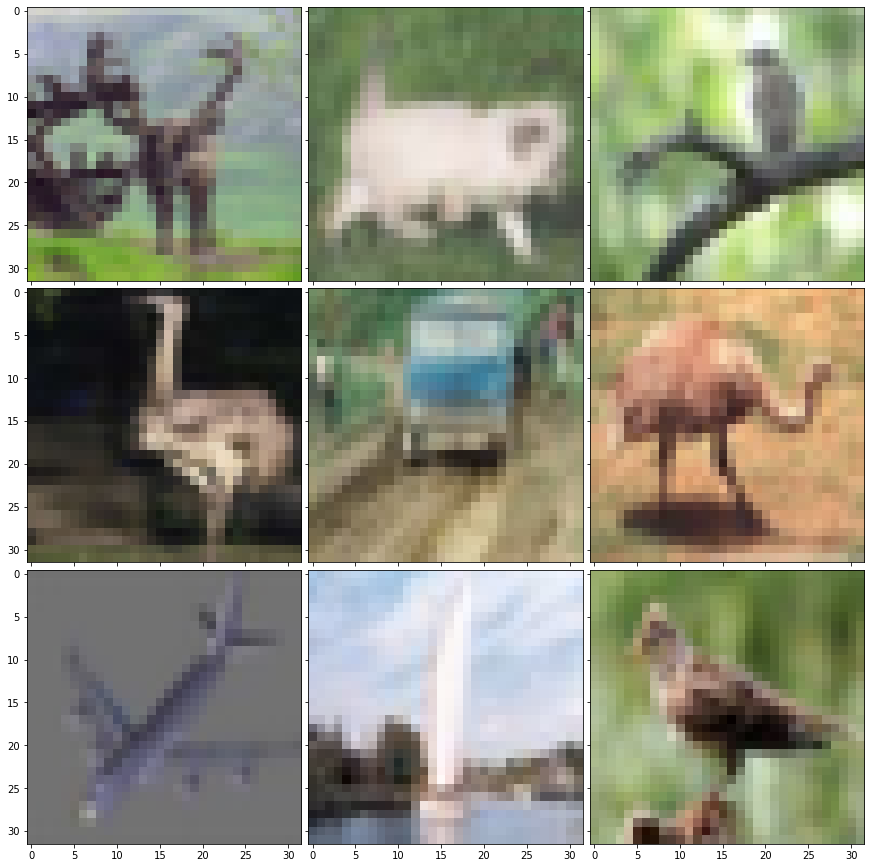

In [7]:
import random # u may need this library
random.seed(100) # set a seed in case you want your experiments to be consistent

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np



def draw_func(list_of_imgs):
  # Your code here
  allIndexes = list(range(0,len(list_of_imgs)))
  sampleIndexes = random.sample(allIndexes,9)

  fig = plt.figure(figsize=(15., 20.))
  grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
  color= plt.cm.gray if len(list_of_imgs.shape) <= 3 else None
  for ax, im_index in zip(grid, sampleIndexes):
    # Iterating over the grid returns the Axes.
    ax.imshow(list_of_imgs[im_index],interpolation='none', cmap=color)
  plt.show()

draw_func(x_train)

### Visualize five samples of each class by plotting a grid using the matplotlib library

In [47]:
label_calass = {0: "airplane",1: "automobile",2:"bird", 3:"cat", 4:"deer",5:"dog", 6:"frog", 7:"horse",8:"ship",9:"truck"}
visualize_samples = []
sampleIndexes =[]

for i in range(10):
    images = x_train[np.array(y_train==i).reshape(-1)]
    allIndexes = list(range(0,len(images)))
    sampleIndexes = random.sample(allIndexes,5)
    visualize_samples.append(images[sampleIndexes])

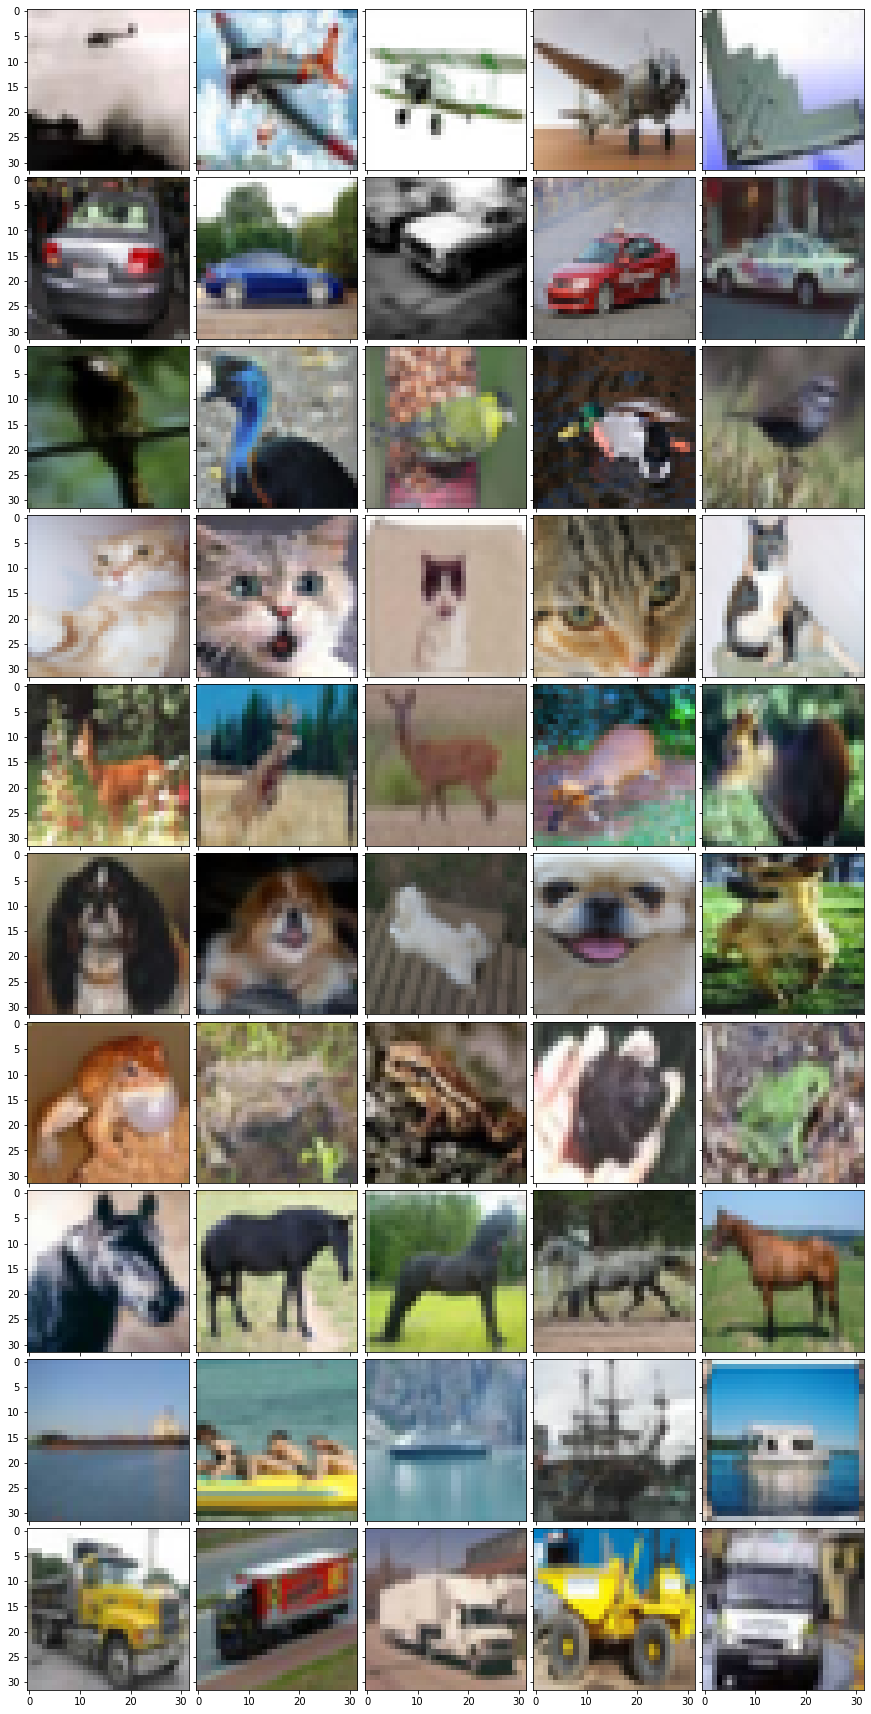

In [62]:

fig = plt.figure(figsize=(15., 40.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                    nrows_ncols=(10, 5),  
                    axes_pad=0.1,  # pad between axes in inch.
                    )
g = 0
for r in range(10):
    for c in range(5):
        grid[g].imshow(visualize_samples[r][c])
        g+=1
plt.show()

# Sample Train and test

In [ ]:
x_train_gray = x_train.copy()[:,:,:,0].reshape(-1,x_train.shape[1]*x_train.shape[2])

In [ ]:
x_test_gray = x_test.copy()[:,:,:,0].reshape(-1,x_train.shape[1]*x_train.shape[2])


In [220]:
train_sample_size = 10000
X_train_sample ,_,y_train_sample, _= train_test_split(x_train_gray,y_train, train_size= train_sample_size,random_state=0)

In [221]:
test_sample_size = 100
_ ,X_test_sample,_, y_test_sample= train_test_split(x_test_gray,y_test, test_size= test_sample_size, random_state=0)

In [226]:
y_train_sample = y_train_sample.flatten()
y_test_sample = y_test_sample.flatten()

# plotting function

In [286]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import pandas as pd
from sklearn.metrics import accuracy_score



In [253]:
def confusion_matrix_binary_classes(y_test,y_pred):
  print(confusion_matrix(y_test, y_pred))
  ax = sns.heatmap(confusion_matrix(y_test,y_pred ), annot=True, cmap='PuBuGn')
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('Confusion Matrix', fontsize=18)
  plt.show()
  print(classification_report(y_test,y_pred))

## Part 1. k-NN Classifier (2 Marks)
For this section you will implement a simple kNN Classifier on the Cifar10 dataset. To do this you will need to perform the following steps:
- Create a k-NN class. Your class must contain a method that returns predictions for your test set.
- Provide a suitable distance metric that you will use to calculate the nearest neightbours. You may choose the distance metric you believe is most suitable.
- Calculate the k nearest neighbours and make predictions.
- Choose the a value for _k_ that results in the highest accuracy on your test set. Show how you found this value.

When your classifier is working:
- Use sklearn to calculate accuracy and plot a confusion matrix using your predictions.
- Provide a brief discussion of your results

### Bonus:

When you compute the distance metric you can acheive better performance if you vectorize the computation instead of using for loops to iterate through the values. You can earn __0.5 bonus marks__ if you only need one loop, or __1 bonus mark__ if you can omit for loops for a fully vectorized distance calculation (a maximum of 1 bonus mark is available).




* KNN implementation reference: https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339

Note that: vectorization is applied in the eaclidean distance function:<br>    return np.sqrt(np.sum((point - data)**2, axis=1)) 

In [228]:
# Write your KNN class here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def most_common(lst):
    lst = list(np.array(lst).flatten())
    return max(set(lst), key=lst.count)
def euclidean(point, data):
    # Euclidean distance between points a & data
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KNeighborsClassifier:
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self, X_test):
        pred = []
        for x in X_test:
            distances = self.dist_metric(x, self.X_train)
            y_sorted = [y for _, y in sorted(zip(distances, self.y_train))]
            pred.append(most_common(y_sorted[:self.k]))
        return pred
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
       
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [224]:
np.unique(y_train_sample,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1006,  997, 1019,  992,  994, 1021,  979,  986, 1059,  947],
       dtype=int64))

In [229]:
X_train_scalled = StandardScaler().fit_transform(X_train_sample)
X_test_scalled = StandardScaler().fit_transform(X_test_sample)

knn = KNeighborsClassifier()
knn.fit(X_train_scalled, y_train_sample)
accuracy2 = knn.evaluate(X_test_scalled, y_test_sample)
accuracy2

0.23

In [283]:

# X_train, X_test = ss.transform(x_train), ss.transform(x_test)
# Test knn model across varying ks
accuracies = []
ks = range(1, 10)
bestK = 1
bestAccuracy = 0
for k in ks:
    knn = KNeighborsClassifier(k=k)
    knn.fit(X_train_scalled, y_train_sample)
    accuracy = knn.evaluate(X_test_scalled, y_test_sample)
    accuracies.append(accuracy)
    if accuracy> bestAccuracy:
        bestAccuracy = accuracy
        bestK = k


Best Accuracy =  0.24  with k =  7


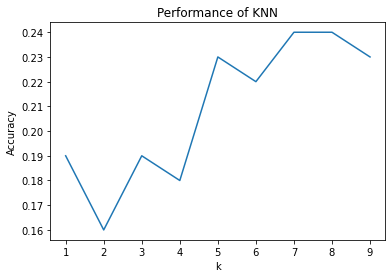

In [284]:
# Visualize accuracy vs. k
print("Best Accuracy = ",bestAccuracy, " with k = ",bestK)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of KNN")
plt.show()

K=  7 Accuracy of KNN : 0.24%

Confusion Matrix OVR:

[[5 0 3 0 2 1 0 0 1 0]
 [2 0 2 1 2 0 1 0 2 0]
 [3 0 3 0 2 0 0 0 2 0]
 [3 0 2 0 2 0 1 0 1 0]
 [2 0 1 0 3 0 0 0 1 0]
 [2 0 4 0 0 4 1 0 2 0]
 [1 0 3 0 2 0 3 0 1 0]
 [4 0 2 0 1 0 0 1 0 0]
 [2 0 0 0 2 0 0 0 5 0]
 [2 1 4 0 1 0 0 0 4 0]]


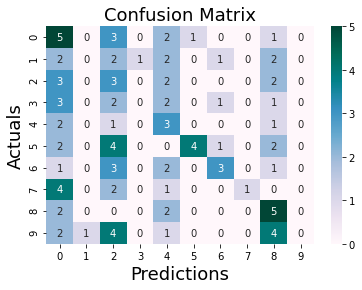

              precision    recall  f1-score   support

           0       0.19      0.42      0.26        12
           1       0.00      0.00      0.00        10
           2       0.12      0.30      0.18        10
           3       0.00      0.00      0.00         9
           4       0.18      0.43      0.25         7
           5       0.80      0.31      0.44        13
           6       0.50      0.30      0.37        10
           7       1.00      0.12      0.22         8
           8       0.26      0.56      0.36         9
           9       0.00      0.00      0.00        12

    accuracy                           0.24       100
   macro avg       0.31      0.24      0.21       100
weighted avg       0.31      0.24      0.21       100



In [287]:

knn = KNeighborsClassifier(k=bestK)
knn.fit(X_train_scalled, y_train_sample)
y_pred_knn = knn.predict(X_test_scalled)
print("K= ",bestK,'Accuracy of KNN : {:.2f}%'.format(accuracy_score(y_test_sample,y_pred_knn)))
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(y_test_sample,y_pred_knn)


## Part 2. Logistic Regression (3 Marks)

For this section you will perform binary classification using logistic regression. Just as in Part 1. you will use the Cifar10 dataset, however to obtain a result for each class using logistic regression you will need to use a One-vs-Rest (OvR) approach to acheive multi-class classification.

Using ```LogisticRegression()``` in sklearn, write a function to execute the OvR strategy for the Cifar10 classes. Do not use the built-in ```OneVsResClassifier()``` method. You will need to follow these basic steps:
- Train a binary classifier for each class, where the target class is a "positive" results and the combination of the remaining classes are "negative". For Cifar10 you will need 10 models.
- For each test sample compute the probabilities for each model
- Select the argmax of the probabilities to obtain the predicted class

Collect your predictions from the test set and compute the accuracy score and plot a confusion matrix.

* Binarize y train and y test

In [235]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
yb_train = mlb.fit_transform(y_train_sample.reshape((-1,1)))
yb_test = mlb.fit_transform(y_test_sample.reshape((-1,1)))

In [242]:
yb0_train = yb_train[:,0]
yb1_train = yb_train[:,1]
yb2_train = yb_train[:,2]
yb3_train = yb_train[:,3]
yb4_train = yb_train[:,4]
yb5_train = yb_train[:,5]
yb6_train = yb_train[:,6]
yb7_train = yb_train[:,7]
yb8_train = yb_train[:,8]
yb9_train = yb_train[:,9]

yb0_test = yb_test[:,0]
yb1_test = yb_test[:,1]
yb2_test = yb_test[:,2]
yb3_test = yb_test[:,3]
yb4_test = yb_test[:,4]
yb5_test = yb_test[:,5]
yb6_test = yb_test[:,6]
yb7_test = yb_test[:,7]
yb8_test = yb_test[:,8]
yb9_test = yb_test[:,9]



### model 0

Accuracy of clf_0: 0.87%

Confusion Matrix OVR:

[[86  2]
 [11  1]]


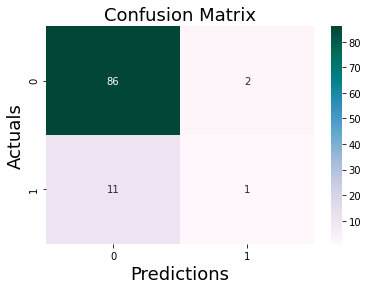

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        88
           1       0.33      0.08      0.13        12

    accuracy                           0.87       100
   macro avg       0.61      0.53      0.53       100
weighted avg       0.82      0.87      0.83       100



In [267]:
# Write your logistic regression code here.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf_0 = LogisticRegression(random_state=0)
clf_0.fit(X_train_scalled, yb0_train)
y0_pred = clf_0.predict(X_test_scalled)
print('Accuracy of clf_0: {:.2f}%'.format(accuracy_score( yb0_test,y0_pred)))
y0_pred_proba = clf_0.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb0_test, y0_pred)


### model 1

Accuracy of clf_1: 0.89%

Confusion Matrix OVR:

[[86  4]
 [ 7  3]]


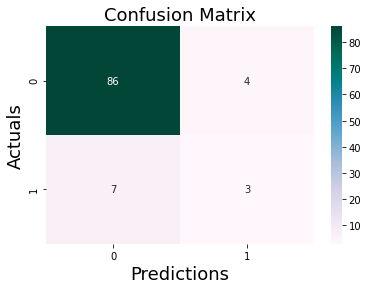

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        90
           1       0.43      0.30      0.35        10

    accuracy                           0.89       100
   macro avg       0.68      0.63      0.65       100
weighted avg       0.88      0.89      0.88       100



In [268]:
clf_1 = LogisticRegression(random_state=0)
clf_1.fit(X_train_scalled, yb1_train)
y1_pred = clf_1.predict(X_test_scalled)
print('Accuracy of clf_1: {:.2f}%'.format(accuracy_score( yb1_test,y1_pred)))
y1_pred_proba = clf_1.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb1_test, y1_pred)


### model 2

Accuracy of clf_2: 0.89%

Confusion Matrix OVR:

[[88  2]
 [ 9  1]]


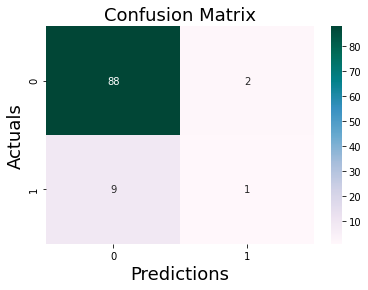

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        90
           1       0.33      0.10      0.15        10

    accuracy                           0.89       100
   macro avg       0.62      0.54      0.55       100
weighted avg       0.85      0.89      0.86       100



In [269]:
clf_2 = LogisticRegression(random_state=0)
clf_2.fit(X_train_scalled, yb2_train)
y2_pred = clf_2.predict(X_test_scalled)
print('Accuracy of clf_2: {:.2f}%'.format(accuracy_score( yb2_test,y2_pred)))
y2_pred_proba = clf_2.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb2_test, y2_pred)


### model 3

Accuracy of clf_3: 0.90%

Confusion Matrix OVR:

[[89  2]
 [ 8  1]]


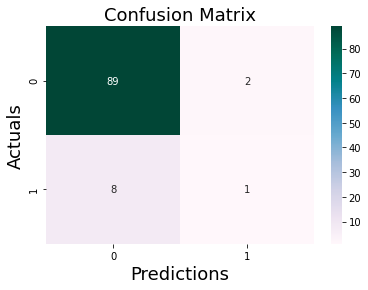

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        91
           1       0.33      0.11      0.17         9

    accuracy                           0.90       100
   macro avg       0.63      0.54      0.56       100
weighted avg       0.86      0.90      0.88       100



In [270]:
clf_3 = LogisticRegression(random_state=0)
clf_3.fit(X_train_scalled, yb3_train)
y3_pred = clf_3.predict(X_test_scalled)
print('Accuracy of clf_3: {:.2f}%'.format(accuracy_score( yb3_test,y3_pred)))
y3_pred_proba = clf_3.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb3_test, y3_pred)


### model 4

Accuracy of clf_4: 0.89%

Confusion Matrix OVR:

[[89  4]
 [ 7  0]]


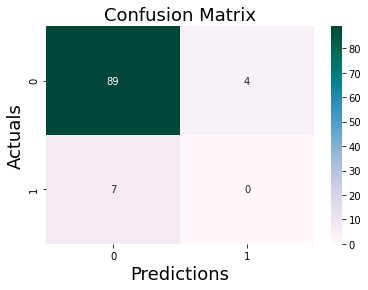

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        93
           1       0.00      0.00      0.00         7

    accuracy                           0.89       100
   macro avg       0.46      0.48      0.47       100
weighted avg       0.86      0.89      0.88       100



In [271]:
clf_4 = LogisticRegression(random_state=0)
clf_4.fit(X_train_scalled, yb4_train)
y4_pred = clf_4.predict(X_test_scalled)
print('Accuracy of clf_4: {:.2f}%'.format(accuracy_score( yb4_test,y4_pred)))
y4_pred_proba = clf_4.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb4_test, y4_pred)


### model 5

Accuracy of clf_5: 0.88%

Confusion Matrix OVR:

[[87  0]
 [12  1]]


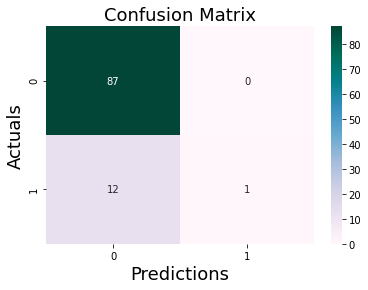

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        87
           1       1.00      0.08      0.14        13

    accuracy                           0.88       100
   macro avg       0.94      0.54      0.54       100
weighted avg       0.89      0.88      0.83       100



In [272]:
clf_5 = LogisticRegression(random_state=0)
clf_5.fit(X_train_scalled, yb5_train)
y5_pred = clf_5.predict(X_test_scalled)
print('Accuracy of clf_5: {:.2f}%'.format(accuracy_score( yb5_test,y5_pred)))
y5_pred_proba = clf_5.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb5_test, y5_pred)


### model 6

Accuracy of clf_6: 0.87%

Confusion Matrix OVR:

[[87  3]
 [10  0]]


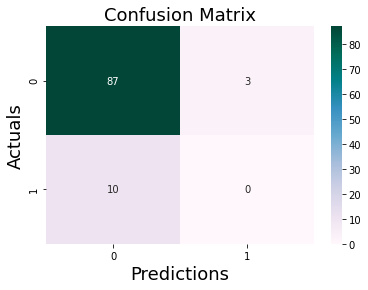

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        90
           1       0.00      0.00      0.00        10

    accuracy                           0.87       100
   macro avg       0.45      0.48      0.47       100
weighted avg       0.81      0.87      0.84       100



In [273]:
clf_6 = LogisticRegression(random_state=0)
clf_6.fit(X_train_scalled, yb6_train)
y6_pred = clf_6.predict(X_test_scalled)
print('Accuracy of clf_6: {:.2f}%'.format(accuracy_score( yb6_test,y6_pred)))
y6_pred_proba = clf_6.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb6_test, y6_pred)


### model 7

Accuracy of clf_7: 0.91%

Confusion Matrix OVR:

[[91  1]
 [ 8  0]]


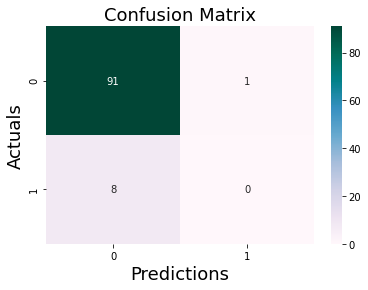

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        92
           1       0.00      0.00      0.00         8

    accuracy                           0.91       100
   macro avg       0.46      0.49      0.48       100
weighted avg       0.85      0.91      0.88       100



In [274]:

clf_7 = LogisticRegression(random_state=0)
clf_7.fit(X_train_scalled, yb7_train)
y7_pred = clf_7.predict(X_test_scalled)
print('Accuracy of clf_7: {:.2f}%'.format(accuracy_score( yb7_test,y7_pred)))
y7_pred_proba = clf_7.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb7_test, y7_pred)


### model 8

Accuracy of clf_8: 0.87%

Confusion Matrix OVR:

[[86  5]
 [ 8  1]]


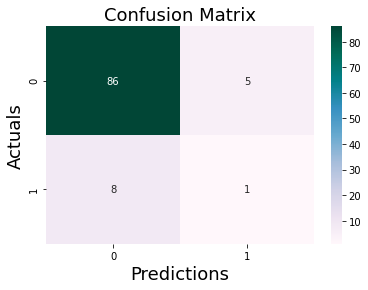

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        91
           1       0.17      0.11      0.13         9

    accuracy                           0.87       100
   macro avg       0.54      0.53      0.53       100
weighted avg       0.85      0.87      0.86       100



In [275]:

clf_8 = LogisticRegression(random_state=0)
clf_8.fit(X_train_scalled, yb8_train)
y8_pred = clf_8.predict(X_test_scalled)
print('Accuracy of clf_8: {:.2f}%'.format(accuracy_score( yb8_test,y8_pred)))
y8_pred_proba = clf_8.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb8_test, y8_pred)


### model 9

Accuracy of clf_9: 0.88%

Confusion Matrix OVR:

[[86  2]
 [10  2]]


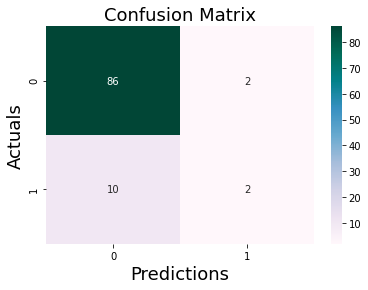

              precision    recall  f1-score   support

           0       0.90      0.98      0.93        88
           1       0.50      0.17      0.25        12

    accuracy                           0.88       100
   macro avg       0.70      0.57      0.59       100
weighted avg       0.85      0.88      0.85       100



In [276]:

clf_9= LogisticRegression(random_state=0)
clf_9.fit(X_train_scalled, yb9_train)
y9_pred = clf_9.predict(X_test_scalled)
print('Accuracy of clf_9: {:.2f}%'.format(accuracy_score( yb9_test,y9_pred)))
y9_pred_proba = clf_9.predict_proba(X_test_scalled)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb9_test, y9_pred)


Don't get fooled by the accuracy of these models, those ara the accuracies for the 'Rest" class (0) and our focus is for class (1) which has low f1-score values.<br>
Class (1) has the highest f1-score for class 1 =0.35 meaning that it more likely to be truly predicted compared to the other claess that have low f1-score and even 0 value.

### Argamx probabilities

In [277]:
yb_all = np.hstack((y0_pred_proba,y1_pred_proba, y2_pred_proba, y3_pred_proba, y4_pred_proba,y5_pred_proba,y6_pred_proba,y7_pred_proba,y8_pred_proba,y9_pred_proba))
predicted_clases = mlb.classes_[np.argmax(yb_all, axis=1)]
predicted_clases

array([5, 3, 2, 2, 3, 0, 0, 8, 1, 2, 0, 9, 1, 9, 8, 5, 8, 6, 4, 4, 4, 8,
       2, 9, 2, 9, 5, 2, 2, 1, 4, 3, 0, 5, 1, 8, 9, 8, 8, 7, 1, 1, 6, 8,
       7, 1, 4, 3, 6, 5, 5, 4, 4, 0, 1, 0, 8, 0, 5, 2, 4, 3, 6, 4, 1, 9,
       8, 3, 1, 7, 8, 2, 1, 5, 2, 3, 2, 1, 5, 0, 6, 3, 2, 9, 1, 4, 3, 4,
       6, 7, 8, 3, 1, 2, 8, 7, 1, 0, 4, 6], dtype=object)

the final model accuracy :0.23

Confusion Matrix:

[[4 1 3 0 2 1 0 0 0 1]
 [0 4 2 0 0 0 1 1 1 1]
 [0 3 2 1 1 0 1 0 1 1]
 [1 3 1 3 0 1 0 0 0 0]
 [0 0 1 1 2 0 1 0 2 0]
 [1 0 0 2 3 4 1 1 1 0]
 [1 1 1 1 1 1 0 1 3 0]
 [0 0 2 1 1 1 3 0 0 0]
 [1 1 1 0 0 1 0 1 2 2]
 [1 2 0 1 2 0 0 1 3 2]]


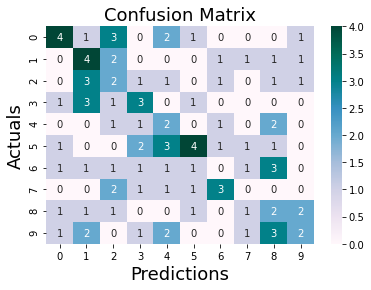

              precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.27      0.40      0.32        10
           2       0.15      0.20      0.17        10
           3       0.30      0.33      0.32         9
           4       0.17      0.29      0.21         7
           5       0.44      0.31      0.36        13
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00         8
           8       0.15      0.22      0.18         9
           9       0.29      0.17      0.21        12

    accuracy                           0.23       100
   macro avg       0.22      0.22      0.22       100
weighted avg       0.24      0.23      0.23       100



In [282]:
y_true = y_test_sample.squeeze().astype(int)
y_pred =  predicted_clases.squeeze().astype(int)
print(f"the final model accuracy :{accuracy_score(y_true, y_pred)}")
print('\nConfusion Matrix:\n')
confusion_matrix_binary_classes(y_true, y_pred)

you can see from the earlier coment that class (1) has high f1-score relatively and has the highest recall value = 0.40

## Part 3. Support Vector Machine (SVM) Classification (4 Marks)

In Part 3. you will use Scikit-learn to perform classification, again on the Cifar10 dataset. You can use the built in SVM library for classification. As with logistic regression, SVM is designed for binary classification. However, in this case Scikit-learn will handle the OvR models behind the scenes.

Your task is to compare different modes of the SVM and determine the best performer. 

Create an SVM baseline using the <code>LinearSVC()</code> function. Make sure to use the primal solution and use "ovr" for multiclass Calculate the accuracy score for comparison.

Next you will explore the effect of the cost parameter on the accuracy.
    <ul>
    <li>Run the classification with a range of C values For example: [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]</li>
    <li>Plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

Add a regularization term.
    <ul>
    <li>Rerun the above experiment, but this time use L1 regularization.</li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>

For the final experiment you will use the ```SVC()``` function to run the classifer with a kernel.
    <ul>
    <li>Use a radial basis function when training a new model</li>
    <li>Find the optimal combination of values for the cost and gamma parameters. Use the following values in your loop:<br/>
        <div style="margin-left:40px"><code>
        for cost in [0.01, 0.1, 1, 10, 100]:<br/>
        &emsp;for gamma in [0.01, 0.1, 1, 10, 100]:
        </code></div>
    </li>
    <li>Again, plot the results as an accuracy vs. C-parameter curve on a logarithmic scale.</li>
    </ul>


Choose the model with the highest accuracy and plot the confusion matrix. In your discussion explain the results of your experiments and the reason for increased performance from the baseline (if any). Comment on the effect of the cost-paramenter and the L1 penalty on accuracy as well as any overfitting you observed. Discuss the confusion matrix of the model accuracy and provide some reasons for high-values found off the main diagonal.

### Bonus Mark
Instead of using raw pixel values compute an alternate feature representation for your dataset and re-run train the model. Compare the accuracy of the model using the new feature representation with the model trained with pixel values.

### Baseline LinearSVC

In [289]:
# Run your SVM experiments here.
from sklearn.svm import LinearSVC
baseline_c_accuracies = []
c_values =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
for c in c_values:
    linear_svm = LinearSVC(C=c, multi_class="ovr")
    linear_svm.fit(X_train_scalled,y_train_sample)
    prediction =linear_svm.predict(X_test_scalled)
    acc = accuracy_score(y_test_sample, prediction)
    baseline_c_accuracies.append(acc) 


best accuracy = 0.31


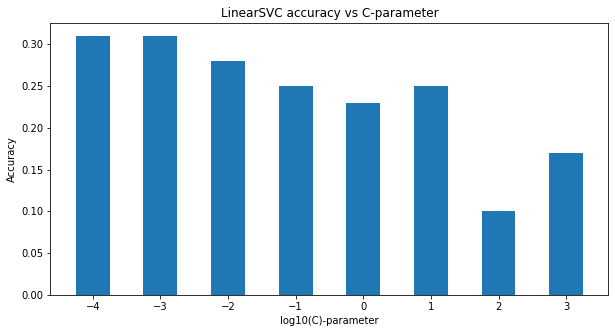

In [322]:
print("best accuracy =",max(baseline_c_accuracies))
plt.figure(figsize = (10, 5))
plt.bar(np.log10(c_values), baseline_c_accuracies, width=.5)
plt.title("LinearSVC accuracy vs C-parameter")
plt.ylabel("Accuracy")
plt.xlabel("log10(C)-parameter")
plt.show()

### comparing c-parameter accuracies with L1 regualization

In [309]:
# Run your SVM experiments here.
from sklearn.svm import LinearSVC
baseline_c_l1_accuracies = []
c_values =[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000 ]
for c in c_values:
    linear_svm = LinearSVC(C=c, multi_class="ovr", penalty="l1", dual=False)
    linear_svm.fit(X_train_scalled,y_train_sample)
    prediction =linear_svm.predict(X_test_scalled)
    acc = accuracy_score(y_test_sample, prediction)
    baseline_c_l1_accuracies.append(acc) 


best accuracy = 0.35


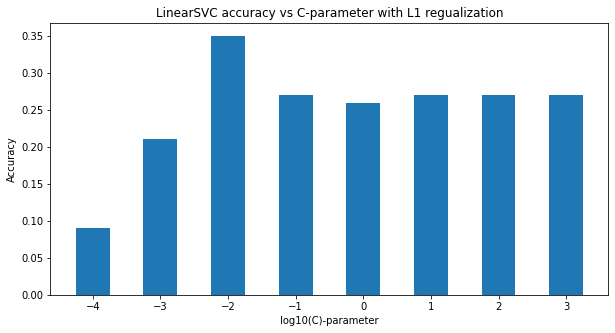

In [320]:
print("best accuracy =",max(baseline_c_l1_accuracies))

plt.figure(figsize = (10, 5))
plt.bar(np.log10(c_values), baseline_c_l1_accuracies, width=.5)
plt.title("LinearSVC accuracy vs C-parameter with L1 regualization")
plt.ylabel("Accuracy")
plt.xlabel("log10(C)-parameter")
plt.show()

at C= .01 higher accuracy relatively to the other C values 


### SVC

In [315]:
from sklearn.svm import SVC


svc_accuracies = []
cost_values =[ 0.01, 0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1, 10, 100]
for cost in cost_values:
    gamma_accuracies =[]
    for gamma in gamma_values:
        kernel_svm = SVC(C=cost, kernel='rbf',gamma=gamma,decision_function_shape="ovr")
        kernel_svm.fit(X_train_scalled,y_train_sample)
        prediction =kernel_svm.predict(X_test_scalled)
        acc = accuracy_score(y_test_sample, prediction)
        gamma_accuracies.append(acc)
    svc_accuracies.append(max(gamma_accuracies)) 

best accuracy = 0.23


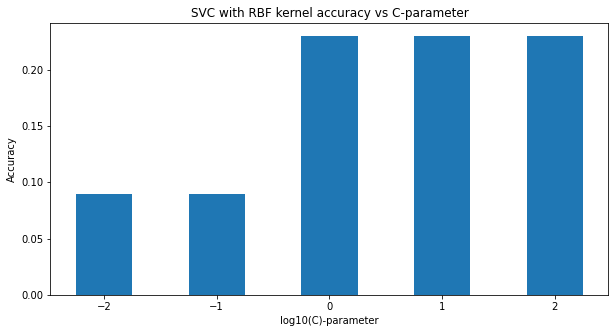

In [319]:
print("best accuracy =",max(svc_accuracies))
plt.figure(figsize = (10, 5))
plt.bar(np.log10(cost_values), svc_accuracies, width=.5)
plt.title("SVC with RBF kernel accuracy vs C-parameter")
plt.ylabel("Accuracy")
plt.xlabel("log10(C)-parameter")
plt.show()

LinearSVC model has the highest accuracy 0.35 with C=.01 and L1 rugalization.
as l1 removes less important features for more generalized model with less overfitting model.

accuracy = 0.35

Confusion Matrix for the best model:

[[2 1 1 0 1 1 2 2 1 1]
 [0 7 0 1 0 0 0 2 0 0]
 [1 1 0 0 2 0 1 0 4 1]
 [1 4 1 1 0 1 0 1 0 0]
 [0 0 0 0 4 0 1 0 2 0]
 [1 0 0 0 1 7 1 1 2 0]
 [1 1 0 1 0 2 2 1 1 1]
 [1 0 1 0 0 2 1 2 1 0]
 [1 0 0 0 0 1 0 1 5 1]
 [0 2 0 0 1 1 0 1 2 5]]


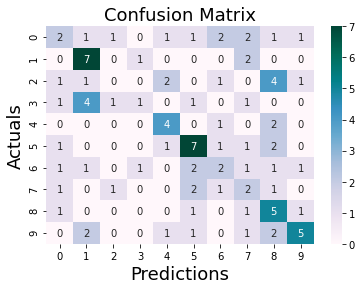

              precision    recall  f1-score   support

           0       0.25      0.17      0.20        12
           1       0.44      0.70      0.54        10
           2       0.00      0.00      0.00        10
           3       0.33      0.11      0.17         9
           4       0.44      0.57      0.50         7
           5       0.47      0.54      0.50        13
           6       0.25      0.20      0.22        10
           7       0.18      0.25      0.21         8
           8       0.28      0.56      0.37         9
           9       0.56      0.42      0.48        12

    accuracy                           0.35       100
   macro avg       0.32      0.35      0.32       100
weighted avg       0.33      0.35      0.32       100



In [324]:
linear_svm = LinearSVC(C=.01, multi_class="ovr", penalty="l1", dual=False)
linear_svm.fit(X_train_scalled,y_train_sample)
prediction =linear_svm.predict(X_test_scalled)
acc = accuracy_score(y_test_sample, prediction)
print("accuracy =",acc)
print('\nConfusion Matrix for the best model:\n')
confusion_matrix_binary_classes(y_test_sample, prediction)


from the confusion matrix diagonal we see that the highest true prediction ara class 1 and 5. class1 7 are truely predicted out of 10 actual so it has the highest recall, other than class5 7 out of 13 so it has less racall value.
class1, class4, and class5 are having the highest f1_score.
Note That, even class8 has 5 TP more than class4 4 TP but class4 has higher f1 score as the percision for class8 is lower
 

### Try features from the images harris corner

reference: https://www.geeksforgeeks.org/python-corner-detection-with-harris-corner-detection-method-using-opencv/

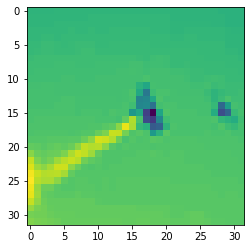

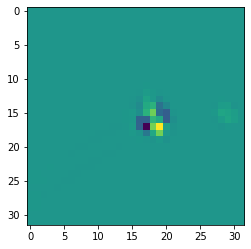

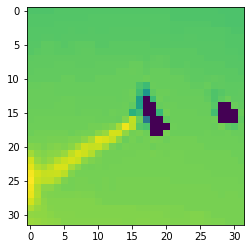

In [427]:
# Python program to illustrate
# corner detection with
# Harris Corner Detection Method
 
# organizing imports
import cv2
import numpy as np


 
# modify the data type
# setting to 32-bit floating point\
image = X_train_sample.copy().reshape(-1,32,32)[0]
operatedImage = np.float32(image)
 
# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
 
# Results are marked through the dilated corners
# dest = cv2.dilate(dest, None)
plt.imshow(image)
plt.show()
# # Reverting back to the original image,
# # with optimal threshold value
image[dest > 0.05 * dest.max()]=[0]
 
# # the window showing output image with corners
# cv2.imshow('Image with Borders', image,)

plt.imshow(dest)
plt.show()
plt.imshow(image)

 
# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()

* apply for training data

In [436]:
haris_train =[]
for image in X_train_sample.copy().reshape(-1,32,32):
    operatedImage = np.float32(image)
    dest = cv2.cornerHarris(operatedImage, 2, 3, 0.09)
    image[dest > 0.001 * dest.max()]=[0]
    haris_train.append(image)


* apply for testing data

In [437]:
haris_test =[]
for image in X_test_sample.copy().reshape(-1,32,32):
    operatedImage = np.float32(image)
    dest = cv2.cornerHarris(operatedImage, 2, 3, 0.09)
    image[dest > 0.001 * dest.max()]=[0]
    haris_test.append(image)

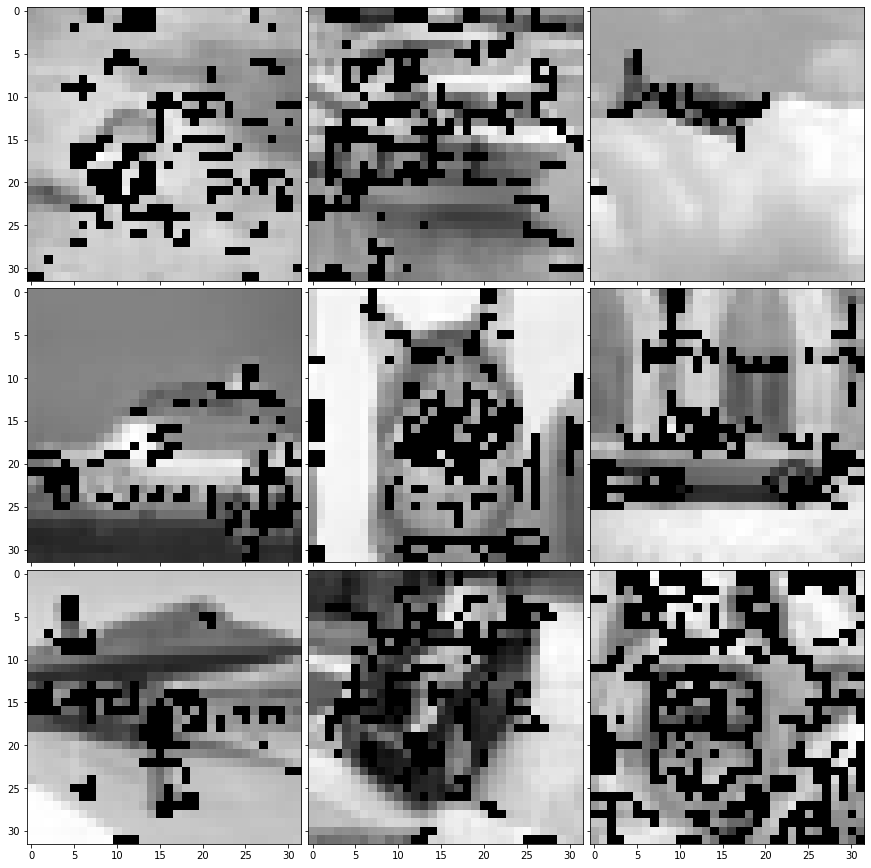

In [438]:
haris_train = np.array(haris_train)
haris_test = np.array(haris_test)

draw_func(haris_train)

accuracy = 0.37

Confusion Matrix

[[3 1 1 0 1 0 3 1 2 0]
 [0 6 0 0 0 0 0 1 1 2]
 [1 0 1 0 2 0 2 1 3 0]
 [1 2 3 0 1 0 0 0 0 2]
 [0 0 1 0 4 1 0 0 1 0]
 [0 2 0 1 0 7 0 2 1 0]
 [1 0 0 0 1 0 3 1 1 3]
 [1 2 2 0 0 0 0 2 1 0]
 [0 0 0 0 0 1 1 0 6 1]
 [1 1 0 0 0 2 0 0 3 5]]


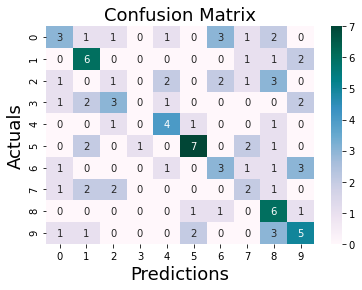

              precision    recall  f1-score   support

           0       0.38      0.25      0.30        12
           1       0.43      0.60      0.50        10
           2       0.12      0.10      0.11        10
           3       0.00      0.00      0.00         9
           4       0.44      0.57      0.50         7
           5       0.64      0.54      0.58        13
           6       0.33      0.30      0.32        10
           7       0.25      0.25      0.25         8
           8       0.32      0.67      0.43         9
           9       0.38      0.42      0.40        12

    accuracy                           0.37       100
   macro avg       0.33      0.37      0.34       100
weighted avg       0.34      0.37      0.35       100



In [439]:
haris_train_scalled = StandardScaler().fit_transform(haris_train.reshape(-1,32*32))
haris_test_scalled = StandardScaler().fit_transform(haris_test.reshape(-1,32*32))
linear_svm = LinearSVC(C=.01, multi_class="ovr", penalty="l1", dual=False)
linear_svm.fit(haris_train_scalled,y_train_sample)
prediction =linear_svm.predict(haris_test_scalled)
acc = accuracy_score(y_test_sample, prediction)
print("accuracy =",acc)
print('\nConfusion Matrix\n')
confusion_matrix_binary_classes(y_test_sample, prediction)

<AxesSubplot:ylabel='Density'>

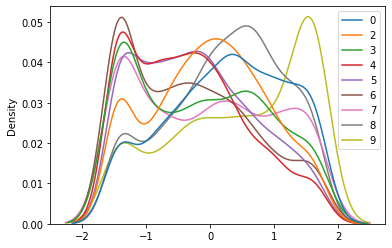

In [426]:
y = y_train_sample
sns.kdeplot([edge[5] for edge in haris_train_scalled[y!=1]] ,hue = y[y!=1], palette= sns.color_palette(n_colors=9))


as you can see with haris corner some classes could be seperated form each other like class 9 and class 1 they have different density curves

## Part 4. Write a Conclusion (1 Mark)

Write a conclusion comparing the results from each part of the assignment. Comment on the suitability of each method for this task.

Knn is a simple model for classification problems, whoever, for high dimentional data like images it doesn't do very well (0.24 accuracy). also the training time is exponentioal to size of the training and testing data, but in my implementation there were no need for training and its all about evaluating the distances between the test point and all the training data points to get the majority class for the nearest k points. <br>

LogisticRegression: also a simple calsification model which can't handle high dimentional data like images well, moreover, it is a binary classification model so whenever we need to use it for a multi class classification we have to use N models of it equal to the number classes to apply One Vs Rest classification for each model. the accuracy = .23 less than KNN.<br>

LinearSVC: is a binary class classification model and also, requires "OVR" or "OVO" techniques for muli-lcass problems.it is very powerfull model it produced 0.31 accuracy which is more than KNN and logisticRegression and that is our Baseline accuracy. changing the regualization to L1 increased the accuracy but only when the C-parameter  = 0.01, I see that L1 is better for our image classification case to remove the least valuable features to reduce the dimentions.<br>

Using SVC model with RBF kernel doesn't increse the accuracy even when using the gris search for the Cost and Gamma hyperparameter tunnig. Acctually, I thought that it be more suitable kernel for higher dimentional data like images but it wasn't. Accuracy  =0.23 <br>

So, the champion model is LinearSVC(C=.01, multi_class="ovr", penalty="l1", dual=False) with accuracy = 0.35<br><br>
An attempt to improve the champion model accuracy is using haris corner algorithm for the corners in the images to be more cleare in the images by changes the pixels values for these corners with 0 values, then training the model again on those images and the accuracy improved to 0.37 



